In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Feature Scaling and Engineering

In [2]:
playlist_features = pd.read_csv('csv_files/playlist_features.csv')
playlist_features.head()

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,00 all yours,0.583,0.569,7.0,-7.9775,1.0,0.03600,0.3700,0.000694,0.1110,0.5520,114.7475
1,00 alright,0.612,0.702,2.0,-5.7070,1.0,0.05280,0.0908,0.000022,0.0806,0.5020,122.8040
2,00 another dream,0.714,0.630,5.0,-6.3450,1.0,0.03630,0.1350,0.000007,0.1320,0.7775,115.9975
3,00 before you go,0.518,0.341,5.0,-9.0890,1.0,0.04115,0.6270,0.000000,0.1105,0.2330,124.1130
4,00 call it love,0.551,0.758,2.0,-7.3850,1.0,0.03520,0.0878,0.000099,0.0960,0.5470,118.0200


In [3]:
playlist_features.drop(['key', 'liveness'], axis=1)

,name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,00 all yours,0.5830,0.5690,-7.9775,1.0,0.03600,0.37000,0.000694,0.5520,114.7475
1,00 alright,0.6120,0.7020,-5.7070,1.0,0.05280,0.09080,0.000022,0.5020,122.8040
2,00 another dream,0.7140,0.6300,-6.3450,1.0,0.03630,0.13500,0.000007,0.7775,115.9975
3,00 before you go,0.5180,0.3410,-9.0890,1.0,0.04115,0.62700,0.000000,0.2330,124.1130
4,00 call it love,0.5510,0.7580,-7.3850,1.0,0.03520,0.08780,0.000099,0.5470,118.0200
...,...,...,...,...,...,...,...,...,...,...
922,95 time's up,0.6095,0.7145,-6.2555,1.0,0.20800,0.06975,0.000000,0.5075,107.0790
923,96 curse the sun,0.6320,0.6625,-8.6790,1.0,0.05835,0.23200,0.005005,0.4845,115.0190
924,97 rejoice,0.6765,0.7340,-5.9230,0.5,0.12650,0.11955,0.000003,0.3460,117.5340
925,98 the shape we make,0.6030,0.5090,-6.8240,1.0,0.03410,0.37100,0.000197,0.5720,121.0320


In [4]:
pnames = playlist_features.pop('name')
for column in playlist_features.columns:
    playlist_features[column] = playlist_features[column] / playlist_features[column].abs().max()

playlist_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.727386,0.630820,0.636364,-0.482578,1.0,0.122658,0.390295,0.000968,0.342065,0.624788,0.694043
1,0.763568,0.778271,0.181818,-0.345230,1.0,0.179898,0.095781,0.000030,0.248382,0.568195,0.742772
2,0.890830,0.698448,0.454545,-0.383824,1.0,0.123680,0.142405,0.000009,0.406780,0.880023,0.701603
3,0.646288,0.378049,0.454545,-0.549815,1.0,0.140204,0.661392,0.000000,0.340524,0.263724,0.750690
4,0.687461,0.840355,0.181818,-0.446736,1.0,0.119932,0.092616,0.000138,0.295840,0.619128,0.713836


### PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

pc = pd.DataFrame(pca.fit_transform(playlist_features))
pc.head()

,0,1
0,-0.072621,0.090655
1,-0.336906,0.296186
2,-0.387444,0.234522
3,0.362352,-0.030980
4,-0.334308,0.305526


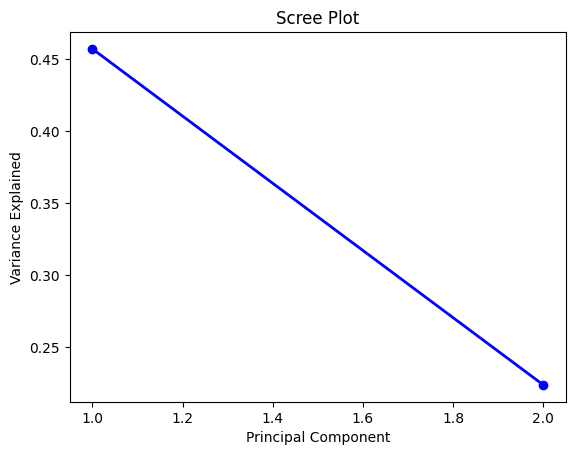

In [7]:
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [8]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = playlist_features.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
danceability,-0.146235,-0.043539
energy,-0.414941,0.172587
key,-0.076715,-0.174890
loudness,-0.300264,0.129961
mode,0.359615,0.900512
speechiness,-0.094239,-0.070723
acousticness,0.704321,-0.314642
instrumentalness,0.019862,-0.011267
liveness,-0.075495,0.032760


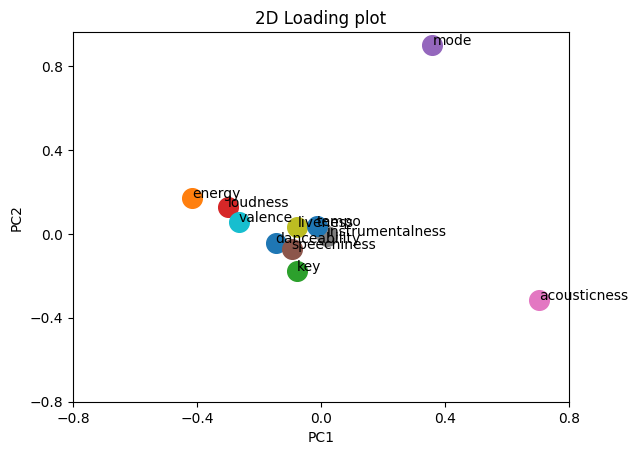

In [9]:
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot')
plt.show()

In [10]:
pc['name'] = pnames
pc.columns = ['pc1', 'pc2', 'name']
pc.head()

,pc1,pc2,name
0,-0.072621,0.090655,00 all yours
1,-0.336906,0.296186,00 alright
2,-0.387444,0.234522,00 another dream
3,0.362352,-0.030980,00 before you go
4,-0.334308,0.305526,00 call it love


### Clustering

In [11]:
from sklearn_extra.cluster import KMedoids as kmedoids
from sklearn.metrics import silhouette_score

In [12]:
# cluster_X = pd.concat([X, pc], axis=1, join='inner')

# X = playlist_features.drop(['key', 'mode', 'tempo', 'loudness'], axis=1).set_index('name')
X = pc.set_index('name')

In [13]:
s_scores = []

num_clusters = 1
low_score = -1
for i in range(2, 10):
    s = silhouette_score(X, kmedoids(n_clusters=i, random_state=42).fit_predict(X))
    s_scores.append(s)
    if s > low_score:
        low_score = s
        num_clusters = i

print(num_clusters)
print(s_scores)

4
[0.49823533109748575, 0.40335482902158165, 0.5431375999057502, 0.4902145476905874, 0.4554936029058819, 0.4312236599630771, 0.41619081789550716, 0.41704831721234215]


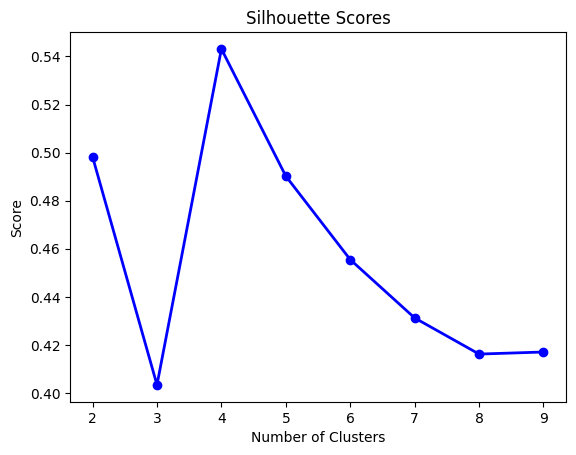

In [14]:
plt.plot(range(2, 10), s_scores, 'o-', linewidth=2, color='blue')
plt.xticks(range(2, 10))
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [15]:
km = kmedoids(n_clusters=4)
clusters = km.fit_predict(X)

clustered = X.copy().reset_index()
clustered['cluster'] = clusters

In [16]:
cluster0 = clustered.loc[clustered['cluster'] == 0]
cluster0

,name,pc1,pc2,cluster
1,00 alright,-0.336906,0.296186,0
2,00 another dream,-0.387444,0.234522,0
4,00 call it love,-0.334308,0.305526,0
6,00 congratulations,-0.361424,0.220828,0
25,00 how can i be,-0.394506,0.242953,0
...,...,...,...,...
915,88 beneath the rising sun,-0.300592,0.211383,0
916,89 the point of no return,-0.177729,0.187679,0
919,92 the big city,-0.304132,0.267768,0
922,95 time's up,-0.405790,0.273359,0


### Visualization

In [17]:
import seaborn as sns

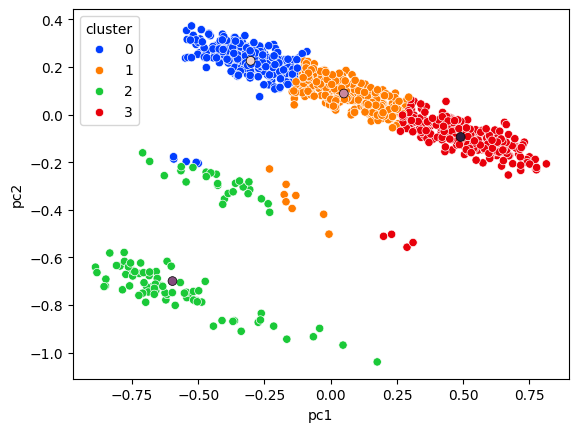

In [18]:
ax = sns.scatterplot(x='pc1', y='pc2', data=clustered, hue='cluster', palette='bright')
ax = sns.scatterplot(x= km.cluster_centers_[:, 0], y = km.cluster_centers_[:, 1], hue=range(num_clusters), s=40, ec='black', legend=False, ax=ax)

plt.show()

### Recommendation System

In [40]:
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
import import_ipynb
import api

In [27]:
playlists = pd.read_csv('csv_files/playlists.csv')

In [20]:
def get_centers(df, centers):
    m = distance_matrix(centers, np.asmatrix(df.to_numpy()))
    return [df.index[i] for i in np.argmin(m, axis=1)]

centers = np.array(km.cluster_centers_)
get_centers(X, centers)

['260 burning', '196 thunder', '455 ask me', '00 change']

In [41]:
def playlist_to_coords(playlist):
    pc1 = clustered.loc[clustered["name"] == playlist]['pc1'].item()
    pc2 = clustered.loc[clustered["name"] == playlist]['pc2'].item()
    coords = np.array([pc1, pc2])
    return coords

def get_cluster(playlist):
    n = clustered[clustered['name'] == playlist]['cluster'].item()
    return clustered[clustered['cluster'] == n]

def closest(playlist):
    cluster_points = get_cluster(playlist).drop(['name', 'cluster'], axis=1)
    distances = euclidean_distances([playlist_to_coords(playlist)], cluster_points)[0]
    closest_index = np.argmin(distances)
    closest_name = clustered.iloc[closest_index]['name']
    closest_link = api.get_url(closest_name)
    return closest_name, closest_link 

In [43]:
closest('696 if you dare me')

AttributeError: module 'api' has no attribute 'get_url'